In [110]:
pip install pefile

In [111]:
from google.colab import drive
from os import path
import pandas as pd
import numpy as np
import pefile

In [112]:
filePath = '/content/gdrive/MyDrive/Colab Notebooks/0a0afad8e8f344e0bc67dd683189abcc.exe'

In [113]:
pe = pefile.PE(filePath)

In [114]:
dir(pe)

['DIRECTORY_ENTRY_IMPORT',
 'DIRECTORY_ENTRY_RESOURCE',
 'DOS_HEADER',
 'FILE_HEADER',
 'FileAlignment_Warning',
 'FileInfo',
 'NT_HEADERS',
 'OPTIONAL_HEADER',
 'PE_TYPE',
 'RICH_HEADER',
 'SectionAlignment_Warning',
 'VS_FIXEDFILEINFO',
 'VS_VERSIONINFO',
 '_PE__from_file',
 '_PE__resource_size_limit_reached',
 '_PE__resource_size_limit_upperbounds',
 '_PE__total_import_symbols',
 '_PE__total_resource_bytes',
 '_PE__total_resource_entries_count',
 '_PE__warnings',
 '__IMAGE_BASE_RELOCATION_ENTRY_format__',
 '__IMAGE_BASE_RELOCATION_format__',
 '__IMAGE_BOUND_FORWARDER_REF_format__',
 '__IMAGE_BOUND_IMPORT_DESCRIPTOR_format__',
 '__IMAGE_DATA_DIRECTORY_format__',
 '__IMAGE_DEBUG_DIRECTORY_format__',
 '__IMAGE_DELAY_IMPORT_DESCRIPTOR_format__',
 '__IMAGE_DOS_HEADER_format__',
 '__IMAGE_EXPORT_DIRECTORY_format__',
 '__IMAGE_FILE_HEADER_format__',
 '__IMAGE_IMPORT_DESCRIPTOR_format__',
 '__IMAGE_LOAD_CONFIG_DIRECTORY64_format__',
 '__IMAGE_LOAD_CONFIG_DIRECTORY_format__',
 '__IMAGE_NT_HE

In [154]:
def opcode_Get(file_path):
    try:
        pe = pefile.PE(file_path,fast_load=True)

        for section in pe.sections:
            if '.text' in str(section.Name):
                entry = section.PointerToRawData - 1
                end = section.SizeOfRawData + entry
                raw_data = pe.__data__[entry:end]
        return raw_data
    except: 
        return

In [155]:
code = opcode_Get(filePath)

In [135]:
value = []
for pixel in code:
  value.append(pixel)

In [121]:
len(value)

405504

In [120]:
from PIL import Image

In [125]:
size = int(np.sqrt(len(value)))

In [128]:
image = Image.new('L', (size + 1, size + 1))

In [129]:
image.putdata(value)

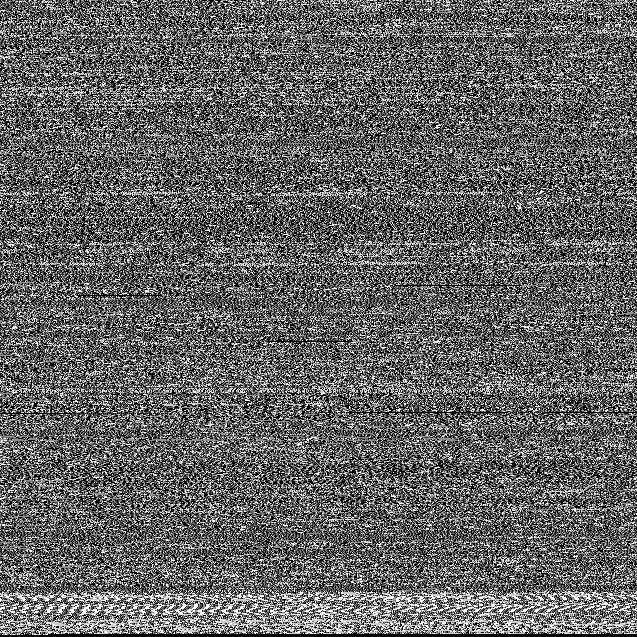

In [130]:
image

In [156]:
for section in pe.sections:
  print(section.Name, hex(section.VirtualAddress), hex(section.Misc_VirtualSize), section.SizeOfRawData)

b'.text\x00\x00\x00' 0x1000 0x629c1 405504
b'.rdata\x00\x00' 0x64000 0xa80c 45056
b'.data\x00\x00\x00' 0x6f000 0x8184 32768
b'.rsrc\x00\x00\x00' 0x78000 0x20bcc 135168
